In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from nltk.corpus import stopwords

1. Definir el corpus

In [168]:
corpus = [
    "el gato duerme tranquilamente en el sofá mientras observa por la ventana",
    "los perros corren rápidamente por el parque persiguiendo una pelota amarilla",
    "el jardín tiene flores de múltiples colores y árboles altos que dan sombra",
    "en el bosque, los pájaros cantan y los ciervos pastan cerca del río cristalino",
    "el gato y el perro comparten la casa, pero a veces pelean por la comida",
    "el estanque del jardín tiene peces de colores brillantes y ranas que croan por la noche",
    "en la ciudad, las personas caminan rápido mientras los autos avanzan lentamente por el tráfico",
    "la biblioteca está llena de libros antiguos y mesas de estudio donde los estudiantes leen en silencio",
    "en la playa, las olas golpean suavemente la arena y los niños construyen castillos mientras los adultos toman el sol",
    "el laboratorio tiene computadoras avanzadas y científicos trabajando en experimentos complejos"
]

1.1. Definimos un corpus mas grande y en inglés

In [5]:
corpus = [
    "The cat sleeps peacefully on the couch while gazing out the window.",
    "Dogs run quickly through the park chasing a yellow ball.",
    "The garden has flowers of multiple colors and tall trees that provide shade.",
    "In the forest, birds sing and deer graze near the crystal-clear river.",
    "The cat and the dog share the house, but sometimes they fight over food.",
    "The garden pond has brightly colored fish and frogs that croak at night.",
    "In the city, people walk quickly while cars move slowly through traffic.",
    "The library is filled with old books and study tables where students read in silence.",
    "On the beach, the waves gently hit the sand and children build sandcastles while adults sunbathe.",
    "The laboratory has advanced computers and scientists working on complex experiments.",
    "The museum displays ancient artifacts and interactive exhibits for visitors to explore.",
    "The restaurant serves a variety of dishes, each prepared with fresh ingredients and unique flavors.",
    "On the mountain trail, hikers trek along rocky paths with breathtaking views of the valley below.",
    "The concert hall is packed with an eager crowd awaiting the start of the symphony.",
    "At the zoo, children watch lions roar and elephants spray water with their trunks.",
    "The supermarket aisles are lined with colorful products, and shoppers fill their carts with essentials.",
    "On the farm, cows graze in the pasture while chickens peck at the ground for food.",
    "The space station orbits Earth, offering astronauts a view of the planet from above.",
    "In the bakery, the smell of freshly baked bread and pastries fills the air.",
    "The amusement park is filled with the sounds of laughter, music, and thrilling rides."
]

2. Generar la matriz Término-Documento

In [3]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(corpus).toarray()
X = X / np.linalg.norm(X, axis=1, keepdims=True)  # Normalización fila por fila
vocab = vectorizer.get_feature_names_out()

# Mostrar la matriz Término-Documento
print("Vocabulario:")
print(vocab)
print("\nMatriz Término-Documento (X):")
print(X)

Vocabulario:
['adults' 'advanced' 'air' 'aisles' 'along' 'amusement' 'ancient'
 'artifacts' 'astronauts' 'awaiting' 'baked' 'bakery' 'ball' 'beach'
 'birds' 'books' 'bread' 'breathtaking' 'brightly' 'build' 'cars' 'carts'
 'cat' 'chasing' 'chickens' 'children' 'city' 'clear' 'colored' 'colorful'
 'colors' 'complex' 'computers' 'concert' 'couch' 'cows' 'croak' 'crowd'
 'crystal' 'deer' 'dishes' 'displays' 'dog' 'dogs' 'eager' 'earth'
 'elephants' 'essentials' 'exhibits' 'experiments' 'explore' 'farm'
 'fight' 'fill' 'filled' 'fills' 'fish' 'flavors' 'flowers' 'food'
 'forest' 'fresh' 'freshly' 'frogs' 'garden' 'gazing' 'gently' 'graze'
 'ground' 'hall' 'hikers' 'hit' 'house' 'ingredients' 'interactive'
 'laboratory' 'laughter' 'library' 'lined' 'lions' 'mountain' 'move'
 'multiple' 'museum' 'music' 'near' 'night' 'offering' 'old' 'orbits'
 'packed' 'park' 'pastries' 'pasture' 'paths' 'peacefully' 'peck' 'people'
 'planet' 'pond' 'prepared' 'products' 'provide' 'quickly' 'read'
 'restaur

2.1. Calcular las Dimensiones de X

In [7]:
N, d_model = X.shape  # Número de documentos y tamaño del vocabulario
num_heads = 7  # Dividir en 3 cabezas
d_k = d_model // num_heads  # Dimensión por cabeza (para simplificar)
d_k

22

Dimensiones clave:
X: (N, d_model), donde N = número de documentos, d_model = tamaño del vocabulario
vocab: (d_model,), contiene los términos únicos del vocabulario

3. Crear las matrices entrenables (W_Q, W_K, W_V)

In [8]:
np.random.seed(42)  # Para reproducibilidad
W_Q = np.random.rand(d_model, d_k)
W_K = np.random.rand(d_model, d_k)
W_V = np.random.rand(d_model, d_k)
W_Q

array([[0.37454012, 0.95071431, 0.73199394, ..., 0.29122914, 0.61185289,
        0.13949386],
       [0.29214465, 0.36636184, 0.45606998, ..., 0.49517691, 0.03438852,
        0.9093204 ],
       [0.25877998, 0.66252228, 0.31171108, ..., 0.35675333, 0.28093451,
        0.54269608],
       ...,
       [0.3245118 , 0.26951186, 0.19092659, ..., 0.87918577, 0.24339668,
        0.55733717],
       [0.03897932, 0.66684739, 0.32302735, ..., 0.9976283 , 0.24149649,
        0.04035083],
       [0.41119152, 0.13008067, 0.02242589, ..., 0.58693651, 0.58095038,
        0.99067916]])

4. Calcular Q, K, V

In [9]:
Q = np.dot(X, W_Q)
K = np.dot(X, W_K)
V = np.dot(X, W_V)
Q

array([[1.42605682, 1.5624604 , 0.77882507, 1.32982496, 0.96629168,
        1.08167365, 1.08274166, 1.50181195, 1.32182191, 1.12502794,
        1.48577728, 0.90408946, 1.07445126, 0.80190572, 1.82637471,
        1.34725353, 1.59213596, 1.62178211, 1.30552006, 1.74679059,
        1.25579195, 1.35549381],
       [1.36904095, 1.55181023, 1.5531807 , 1.75897898, 1.2490784 ,
        1.42245691, 1.31818663, 2.14776845, 1.30571174, 1.40577284,
        1.47735217, 1.28808659, 1.57597899, 0.90853801, 1.4894292 ,
        1.42025564, 1.41104774, 1.2948686 , 1.51391961, 1.0987819 ,
        1.668981  , 0.59420989],
       [1.24515071, 2.14977298, 1.08089719, 0.95651389, 1.23179585,
        0.92232406, 1.52696677, 1.13233524, 1.04611391, 1.58368717,
        1.06832683, 1.90848664, 1.23740378, 1.53821001, 0.96818671,
        1.34552963, 1.19245184, 1.61014697, 1.89321743, 1.50968679,
        1.25779206, 1.50180164],
       [2.04342277, 0.88248407, 2.11317104, 1.3722825 , 1.40979661,
        1.4915379

5. Cálculo de la atención

In [10]:
# Producto QK^T
scores = np.dot(Q, K.T)
# Escalar por raíz de d_k
scaled_scores = scores / np.sqrt(d_k)
# Softmax para obtener los pesos
attention_weights = np.exp(scaled_scores) / np.sum(np.exp(scaled_scores), axis=1, keepdims=True)
# Ponderar V con los pesos
output = np.dot(attention_weights, V)
attention_weights

array([[0.00988381, 0.01615167, 0.04476108, 0.12263409, 0.01388082,
        0.0523455 , 0.04865054, 0.11241722, 0.06972904, 0.01605849,
        0.03201945, 0.04028774, 0.11761332, 0.04015364, 0.0462977 ,
        0.05854532, 0.04586699, 0.06167444, 0.03019148, 0.02083766],
       [0.00874481, 0.01420948, 0.03936516, 0.13859833, 0.01373583,
        0.04568314, 0.04917107, 0.09126852, 0.09664842, 0.01503364,
        0.02898448, 0.04207399, 0.1192306 , 0.03236787, 0.04802069,
        0.06895569, 0.03964477, 0.05978322, 0.02601357, 0.02246672],
       [0.0078725 , 0.01248504, 0.0514677 , 0.14614016, 0.01307615,
        0.0523427 , 0.04599321, 0.10304188, 0.07194447, 0.01315254,
        0.02944357, 0.04671035, 0.12539405, 0.03691451, 0.03883963,
        0.04955906, 0.04329128, 0.06559547, 0.02850959, 0.01822612],
       [0.00718502, 0.01292251, 0.03431806, 0.16454702, 0.01300974,
        0.04949151, 0.04401253, 0.10691544, 0.08838797, 0.01348876,
        0.02335831, 0.04066976, 0.1240555 , 0

In [11]:
output

array([[1.37221995, 1.52202294, 1.45679637, 1.39695913, 1.36858711,
        1.45148411, 1.451135  , 1.46021245, 1.37485272, 1.48827084,
        1.39305935, 1.34812662, 1.65093286, 1.35697644, 1.56299492,
        1.35074563, 1.371278  , 1.33162063, 1.40934719, 1.47460276,
        1.35790603, 1.48558508],
       [1.37264443, 1.53506076, 1.45390066, 1.39183102, 1.35056313,
        1.44812861, 1.45963152, 1.47877235, 1.37928271, 1.48867713,
        1.38455275, 1.36463729, 1.63403012, 1.366115  , 1.58416607,
        1.34350505, 1.38929296, 1.33514498, 1.40034035, 1.46339398,
        1.39249724, 1.50702509],
       [1.36197025, 1.5284683 , 1.45654701, 1.40076622, 1.36355429,
        1.44025603, 1.45235498, 1.45923325, 1.36594891, 1.47727564,
        1.38666066, 1.3702927 , 1.64516726, 1.35929806, 1.57513481,
        1.34853759, 1.38087171, 1.34013332, 1.4065125 , 1.47795743,
        1.37713069, 1.4863138 ],
       [1.37792071, 1.54820876, 1.45528903, 1.40336189, 1.34556339,
        1.4482006

5. Definir Self-Attention

In [12]:
# Definimos la función softmax
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Evitar desbordamiento numérico
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

# Función de Self-Attention
def self_attention(Q, K, V):
    d_k = Q.shape[-1]  # Dimensión de las claves (d_k)
    # 1. Producto QK^T (relaciones entre consultas y claves)
    scores = np.dot(Q, K.T)  # Dimensión: (N, N)
    # 2. Escalamiento por sqrt(d_k)
    scaled_scores = scores / np.sqrt(d_k)
    # 3. Aplicar softmax (normalización de las relaciones)
    attention_weights = softmax(scaled_scores)  # Dimensión: (N, N)
    # 4. Multiplicar por V (valores ponderados por atención)
    output = np.dot(attention_weights, V)  # Dimensión: (N, d_k)
    return output, attention_weights

6. Implementar Multi-Head Attention

In [13]:
# Función de Multi-Head Attention
def multi_head_attention(X, W_Q, W_K, W_V, W_O, num_heads):
    """
    X: Matriz de entrada (N, d_model)
    W_Q, W_K, W_V: Matrices entrenables para Q, K, V (d_model, d_model)
    W_O: Matriz para la proyección final (d_model, d_model)
    num_heads: Número de cabezas de atención
    """
    N, d_model = X.shape
    assert d_model % num_heads == 0, "El número de cabezas debe dividir exactamente d_model"
    d_k = d_model // num_heads  # Dimensión por cabeza

    # Dividir las matrices de proyección para cada cabeza
    heads_output = []  # Lista para almacenar la salida de cada cabeza
    all_attention_weights = []  # Lista para almacenar los pesos de atención de cada cabeza
    for head in range(num_heads):
        # Proyectar las entradas en Q, K, V para esta cabeza
        Q = np.dot(X, W_Q[:, head * d_k:(head + 1) * d_k])  # Dimensión: (N, d_k)
        K = np.dot(X, W_K[:, head * d_k:(head + 1) * d_k])  # Dimensión: (N, d_k)
        V = np.dot(X, W_V[:, head * d_k:(head + 1) * d_k])  # Dimensión: (N, d_k)

        # Calcular Self-Attention para esta cabeza
        head_output, attention_weights = self_attention(Q, K, V)  # Dimensión: (N, d_k)
        heads_output.append(head_output)
        all_attention_weights.append(attention_weights)

    # Concatenar las salidas de todas las cabezas
    concatenated = np.concatenate(heads_output, axis=1)  # Dimensión: (N, d_model)

    # Aplicar proyección final
    output = np.dot(concatenated, W_O[:, :d_model])  # Aseguramos que W_O tenga la forma correcta
    return output, all_attention_weights

7. Visualizar pesos de atención

In [14]:
def visualize_attention(weights, title):
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(8, 6))
    sns.heatmap(weights, annot=True, cmap="Blues", fmt=".2f", cbar=True)
    plt.title(title)
    plt.xlabel("Keys (K)")
    plt.ylabel("Queries (Q)")
    plt.show()

8. Definir parámetros entrenables aleatorios para Multi-Head Attention

In [18]:
d_model = X.shape[1]  # Tamaño del vocabulario
num_heads = 6
print(d_model)
print(num_heads)
assert d_model % num_heads == 0, "El número de cabezas debe dividir exactamente d_model"
d_k = d_model // num_heads  # Dimensión por cabeza (d_model dividido entre num_heads)
np.random.seed(42)  # Para reproducibilidad
W_Q = np.random.rand(d_model, d_model)  # Proyección para Q
np.random.seed(43)  # Para reproducibilidad
W_K = np.random.rand(d_model, d_model)  # Proyección para K
np.random.seed(44)  # Para reproducibilidad
W_V = np.random.rand(d_model, d_model)  # Proyección para V
np.random.seed(45)  # Para reproducibilidad
W_O = np.random.rand(d_model, d_model)  # Proyección final

156
6


9. Calcular la salida y pesos de atención para Self-Attention

In [19]:
# Proyectar X para generar Q, K, V usando matrices entrenables
Q = np.dot(X, W_Q[:, :d_k])  # Proyección para Q (dimensión: (N, d_k))
K = np.dot(X, W_K[:, :d_k])  # Proyección para K (dimensión: (N, d_k))
V = np.dot(X, W_V[:, :d_k])  # Proyección para V (dimensión: (N, d_k))
self_attention_output, self_attention_weights = self_attention(Q, K, V)

10. Calcular la salida y pesos de atención para Multi-Head Attention

In [20]:
multi_head_output, multi_head_attention_weights = multi_head_attention(X, W_Q, W_K, W_V, W_O, num_heads)

11. Mostrar resultados

In [21]:
print("Vocabulario:", vocab)
print("\nSalida de Self-Attention:\n", self_attention_output)
print("\nSalida de Multi-Head Attention:\n", multi_head_output)

Vocabulario: ['adults' 'advanced' 'air' 'aisles' 'along' 'amusement' 'ancient'
 'artifacts' 'astronauts' 'awaiting' 'baked' 'bakery' 'ball' 'beach'
 'birds' 'books' 'bread' 'breathtaking' 'brightly' 'build' 'cars' 'carts'
 'cat' 'chasing' 'chickens' 'children' 'city' 'clear' 'colored' 'colorful'
 'colors' 'complex' 'computers' 'concert' 'couch' 'cows' 'croak' 'crowd'
 'crystal' 'deer' 'dishes' 'displays' 'dog' 'dogs' 'eager' 'earth'
 'elephants' 'essentials' 'exhibits' 'experiments' 'explore' 'farm'
 'fight' 'fill' 'filled' 'fills' 'fish' 'flavors' 'flowers' 'food'
 'forest' 'fresh' 'freshly' 'frogs' 'garden' 'gazing' 'gently' 'graze'
 'ground' 'hall' 'hikers' 'hit' 'house' 'ingredients' 'interactive'
 'laboratory' 'laughter' 'library' 'lined' 'lions' 'mountain' 'move'
 'multiple' 'museum' 'music' 'near' 'night' 'offering' 'old' 'orbits'
 'packed' 'park' 'pastries' 'pasture' 'paths' 'peacefully' 'peck' 'people'
 'planet' 'pond' 'prepared' 'products' 'provide' 'quickly' 'read'
 'restaur

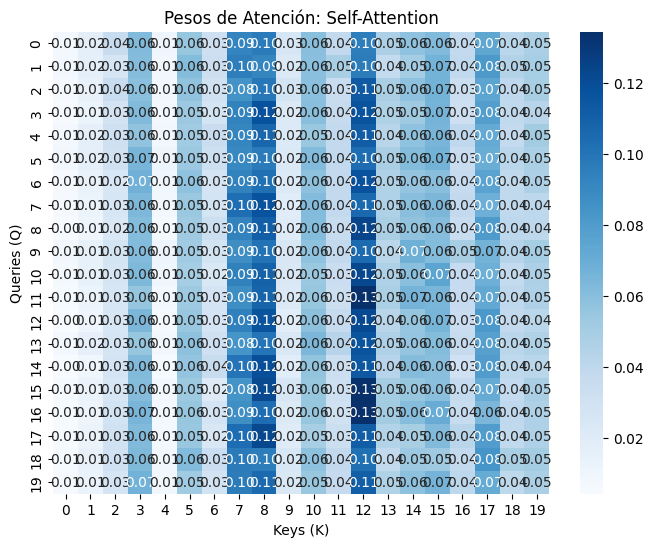

In [22]:
visualize_attention(self_attention_weights, "Pesos de Atención: Self-Attention")

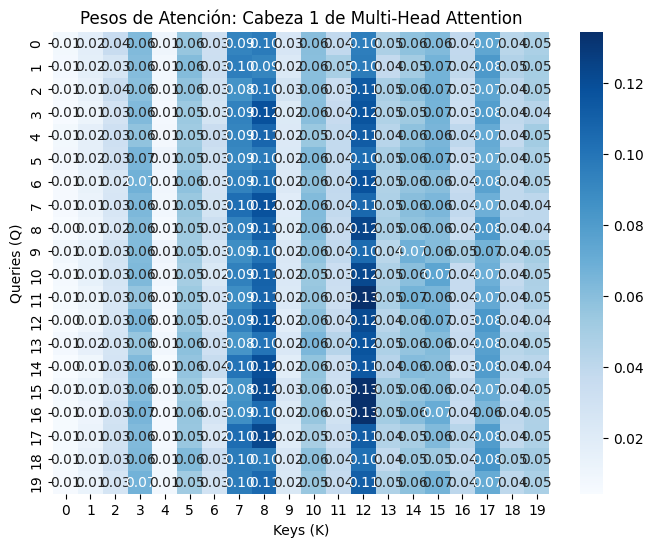

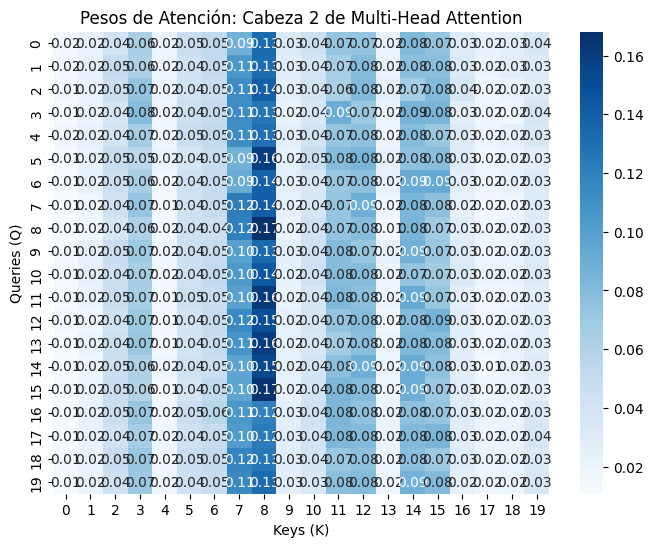

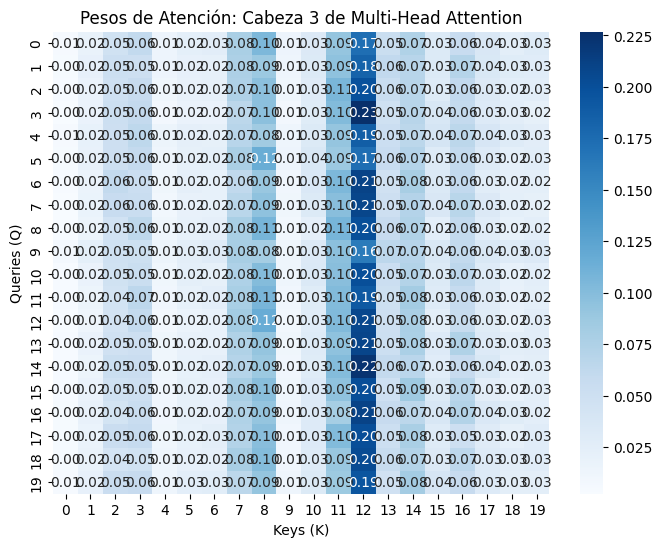

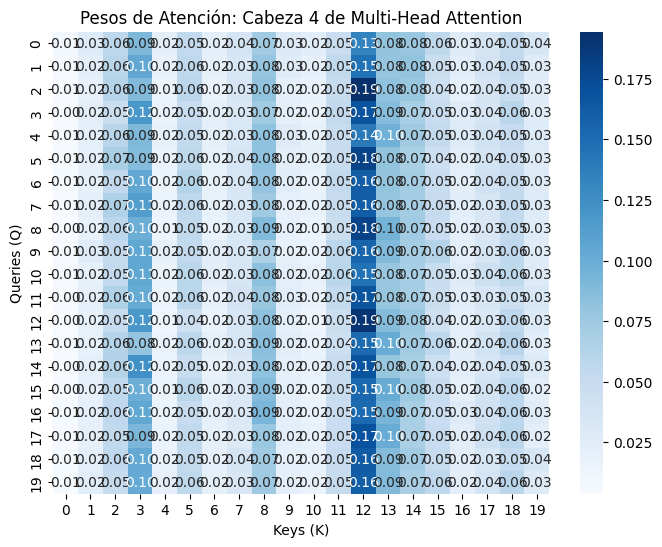

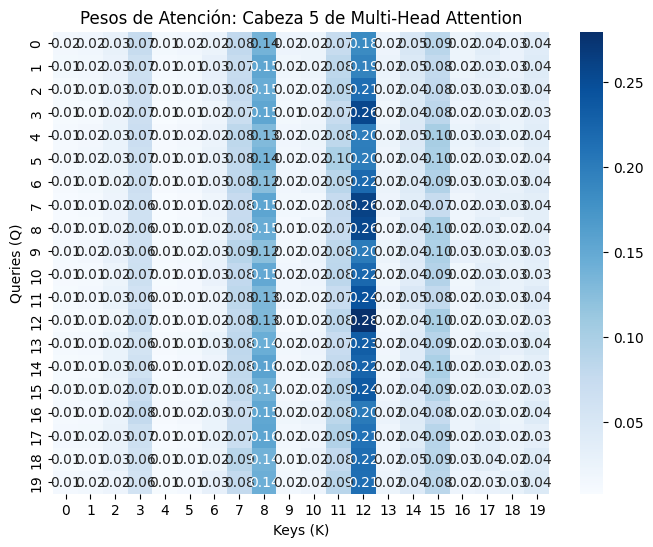

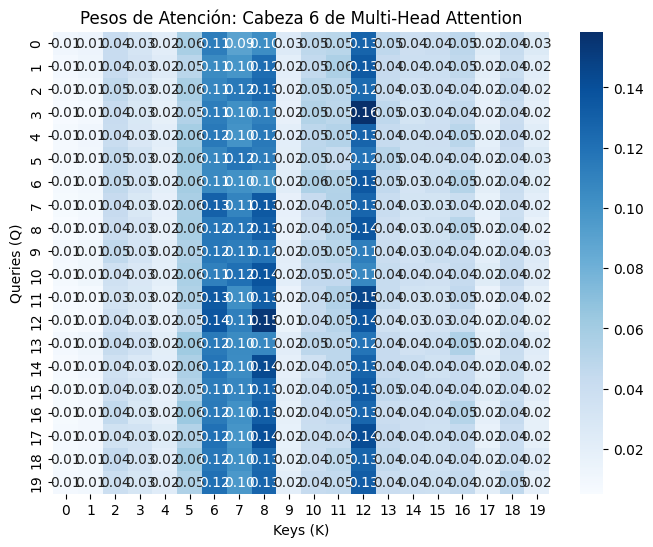

In [23]:
for i, weights in enumerate(multi_head_attention_weights):
    visualize_attention(weights, f"Pesos de Atención: Cabeza {i + 1} de Multi-Head Attention")

### Ejecutar el código para un corpus más grande y en inglés

Como se puede ver anteriormente, he realizado una ejecución del código para un corpus más grande, y que está en inglés, tuve que realizar unas ligeras modificaciones a algunas variables para que este pueda funcionar:

- Cambiar el número de cabeceras a 6

Con esto el código ya pudo funcionar anteriormente y mostrar todos lo que se requería, como podemos ver durante todo el cuaderno de trabajo, desde el inicio hasta la celda anterior a esta.

### Especificar las etapas de BERT y crear gráficas de representación vectorial

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from transformers import BertTokenizer, BertModel
import torch

import warnings
warnings.filterwarnings('ignore')

### Especificación de las etapas de BERT

1. **Tokenización**: Se dividen las palabras de la oración en subpalabras usando el modelo WordPiece.
2. **Codificación de subpalabras**: Las subpalabras se convierten en índices de tokens según el vocabulario de BERT.
3. **Creación de embeddings**: Se genera un vector de embedding para cada subpalabra, combinando embeddings de posición, token y tipo de segmento.
4. **Paso por la red neuronal**: Los embeddings pasan por capas Transformer, con mecanismos de auto-atención para capturar el contexto de las palabras.

Configuración de BERT para obtener los embeddings de las oraciones

In [5]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Definir el corpus
corpus = [
    "The cat sleeps peacefully on the couch while gazing out the window.",
    "Dogs run quickly through the park chasing a yellow ball.",
    "The garden has flowers of multiple colors and tall trees that provide shade.",
    "In the forest, birds sing and deer graze near the crystal-clear river.",
    "The cat and the dog share the house, but sometimes they fight over food.",
    "The garden pond has brightly colored fish and frogs that croak at night.",
    "In the city, people walk quickly while cars move slowly through traffic.",
    "The library is filled with old books and study tables where students read in silence.",
    "On the beach, the waves gently hit the sand and children build sandcastles while adults sunbathe.",
    "The laboratory has advanced computers and scientists working on complex experiments.",
    "The museum displays ancient artifacts and interactive exhibits for visitors to explore.",
    "The restaurant serves a variety of dishes, each prepared with fresh ingredients and unique flavors.",
    "On the mountain trail, hikers trek along rocky paths with breathtaking views of the valley below.",
    "The concert hall is packed with an eager crowd awaiting the start of the symphony.",
    "At the zoo, children watch lions roar and elephants spray water with their trunks.",
    "The supermarket aisles are lined with colorful products, and shoppers fill their carts with essentials.",
    "On the farm, cows graze in the pasture while chickens peck at the ground for food.",
    "The space station orbits Earth, offering astronauts a view of the planet from above.",
    "In the bakery, the smell of freshly baked bread and pastries fills the air.",
    "The amusement park is filled with the sounds of laughter, music, and thrilling rides."
]

Obtener los embeddings de BERT para cada oración

In [6]:
embeddings = []

for sentence in corpus:
    inputs = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    # Usamos la representación [CLS] de la primera posición como la representación de la frase
    sentence_embedding = outputs.last_hidden_state[:, 0, :].numpy().flatten()
    embeddings.append(sentence_embedding)

# Convertir embeddings a un DataFrame
embeddings_df = pd.DataFrame(embeddings)

Reducción de dimensionalidad y gráficas

In [8]:
# 1. Reducción de dimensionalidad con PCA a 2 dimensiones
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings_df)

# 2. Reducción de dimensionalidad con t-SNE a 2 dimensiones
tsne = TSNE(n_components=2, perplexity=15, random_state=42)
tsne_result = tsne.fit_transform(embeddings_df)

Visualización de la representación vectorial con PCA

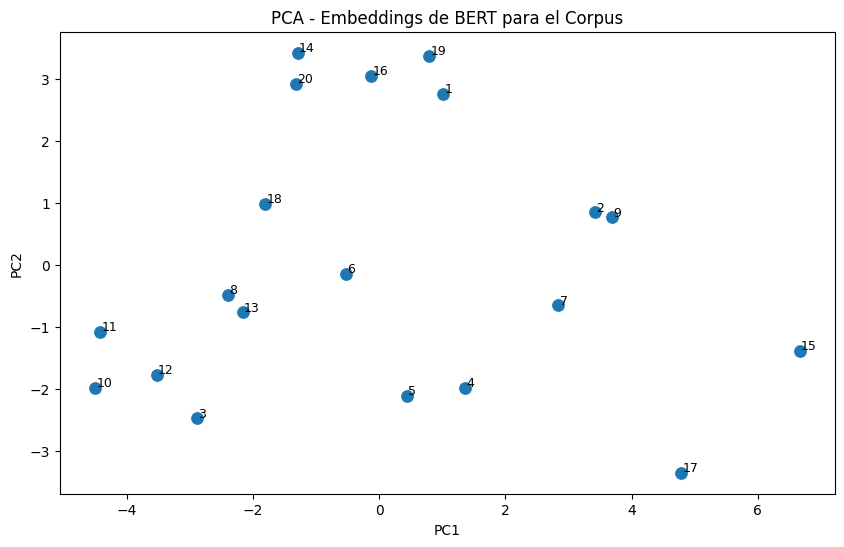

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], s=100, palette='viridis')

# Anotación de las oraciones en la gráfica
for i, sentence in enumerate(corpus):
    plt.text(pca_result[i, 0] + 0.02, pca_result[i, 1] + 0.02, str(i+1), fontsize=9)

plt.title('PCA - Embeddings de BERT para el Corpus')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Visualización de la representación vectorial con t-SNE

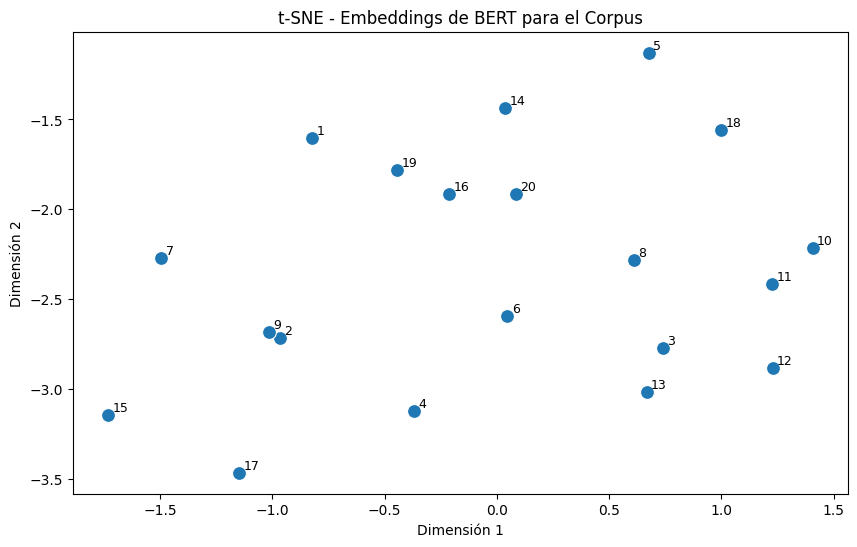

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], s=100, palette='viridis')

# Anotación de las oraciones en la gráfica
for i, sentence in enumerate(corpus):
    plt.text(tsne_result[i, 0] + 0.02, tsne_result[i, 1] + 0.02, str(i+1), fontsize=9)

plt.title('t-SNE - Embeddings de BERT para el Corpus')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()

### Interpretación general de la gráfica de representación vectorial (BERT)

1. **Ejes (X, Y) y valores negativos/positivos**
   - Los ejes son proyecciones de 768 dimensiones a 2D (PCA o t-SNE).
   - Los valores positivos (+X, +Y) y negativos (-X, -Y) no tienen un significado específico, pero la relación entre los puntos sí importa.
   - **Puntos cercanos** = oraciones semánticamente similares.
   - **Puntos lejanos** = oraciones con significados distintos.

2. **Distancia entre puntos**
   - La cercanía refleja similitud semántica entre oraciones.
   - La lejanía indica que las oraciones son diferentes.

3. **Cuadrantes (1°, 2°, 3°, 4°)**
   - Los puntos en el mismo cuadrante tienden a ser similares.
   - Los puntos en cuadrantes opuestos (por ejemplo, 1° y 3°) suelen ser muy diferentes semánticamente.

4. **Ángulo o dirección**
   - No tiene un significado fijo, pero puntos con ángulos similares pueden tener una relación semántica común.
   - En resumen, lo importante no es el signo de los ejes, sino la distancia y agrupación de los puntos, que reflejan similitudes semánticas entre las oraciones.